In [1]:
# Cell 1: Imports
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [2]:
# Cell 2: Generate Synthetic Binary Classification Dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2,
                           weights=[0.7, 0.3], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [3]:
# Cell 3: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [4]:
# Cell 4: Predict and Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"ROC-AUC:   {roc_auc:.2f}")



Precision: 0.84
Recall:    0.75
F1 Score:  0.79
ROC-AUC:   0.92


In [5]:
# Cell 5: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[182  15]
 [ 26  77]]


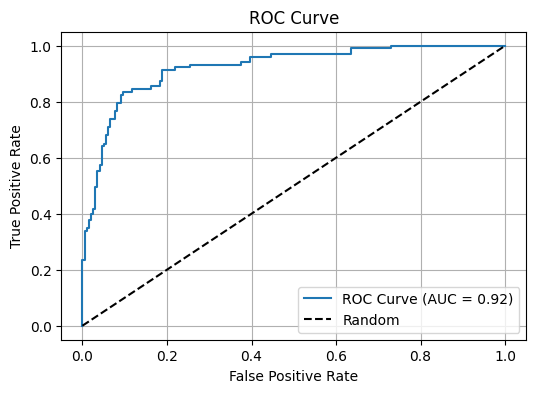

In [6]:

# Cell 6: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


What You’re Seeing:
1. Axes Meaning
X-axis (False Positive Rate, FPR):

Measures the proportion of negative instances that were incorrectly classified as positive.

2. Y-axis (True Positive Rate, TPR or Recall):

Measures how many actual positives were correctly identified.

📈 Interpretation of the ROC Curve

The blue curve shows the trade-off between TPR and FPR at different thresholds.

The dashed diagonal line represents a random guess (AUC = 0.5).

Your model’s AUC = 0.92, which means:

Excellent discrimination between positive and negative classes.

At most thresholds, the model is able to distinguish well between the two.

What Is the Trade-Off?
Threshold is the probability above which a model classifies a sample as positive.

Changing the threshold affects:

How many true positives you catch (TPR, aka Recall)

How many false alarms you raise (FPR)

| Threshold            | TPR (Recall)                                          | FPR                              | Interpretation                                         |
| -------------------- | ----------------------------------------------------- | -------------------------------- | ------------------------------------------------------ |
| **Low** (e.g., 0.1)  | ✅ Very High (almost everything is predicted positive) | ❌ High (lots of false positives) | Catch all positives but flood system with false alarms |
| **Mid** (e.g., 0.5)  | ⚖️ Balanced recall and precision                      | ⚖️ Balanced FPR                  | Good general use case                                  |
| **High** (e.g., 0.9) | ❌ Low (misses many true positives)                    | ✅ Very Low (few false positives) | Very selective, but may miss critical positives        |


📉 Why This Trade-Off Matters
Let’s say you’re building a disease detection model:

Low threshold: You catch almost everyone with the disease (high TPR), but also scare many healthy people (high FPR).

High threshold: Only severe cases are flagged, missing early detection (low TPR), but you avoid false alarms (low FPR).

The right balance depends on the cost of each error:

Cancer detection → False negatives are dangerous → Prefer high TPR

Spam filter → False positives hurt usability → Prefer low FPR